In [8]:
using DelimitedFiles
using Plots

# apo

## minimization

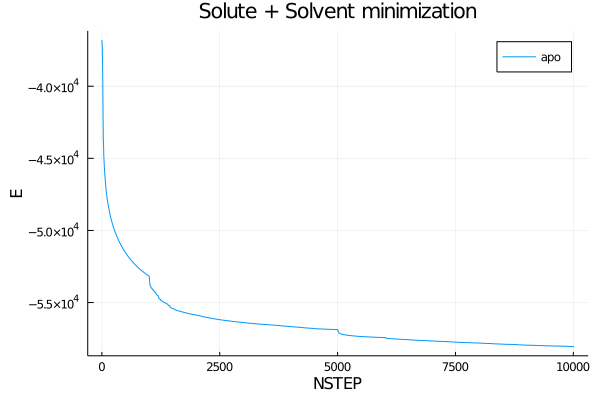

In [6]:
dir_apo_min="/home/pbarletta/labo/20/cph_obp/run/apo/mhe/m"
apo_min_Etot = readdlm("$dir_apo_min/outputs/Etot_min")[:, 2]
apo_mmin_Etot = readdlm("$dir_apo_min/outputs/Etot_mmin")[:, 2]

ntpr = 5
NSTEPS = ntpr * (length(apo_min_Etot) + length(apo_mmin_Etot))
x = collect(0:5:NSTEPS-1)

plot(x, [ apo_min_Etot ; apo_mmin_Etot],
    label = "apo", title = "Solute + Solvent minimization",
    yaxis = "E", xaxis = "NSTEP")

## heat

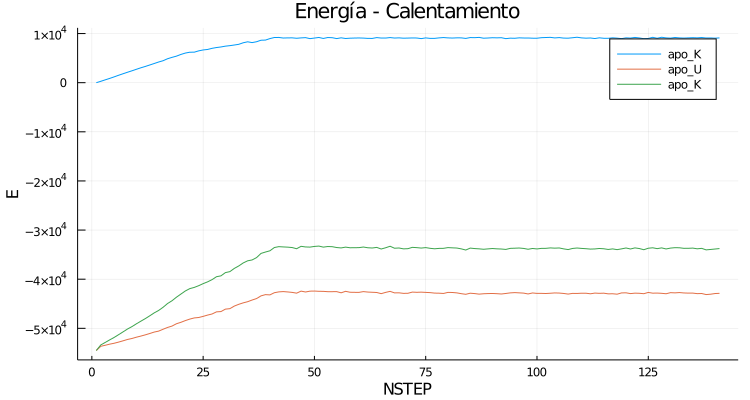

In [11]:
# Energies
dir_apo_hea="/home/pbarletta/labo/20/cph_obp/run/apo/mhe/h"
apo_hea_Ek = readdlm("$dir_apo_hea/outputs/ektot.dat")[:, 2]
apo_hea_Ep = readdlm("$dir_apo_hea/outputs/eptot.dat")[:, 2]
apo_hea_Etot = readdlm("$dir_apo_hea/outputs/etot.dat")[:, 2]

plot(apo_hea_Ek,
    label = "apo_K", title = "Energía - Calentamiento", size = (750, 400),
    yaxis = "E", xaxis = "NSTEP")
plot!(apo_hea_Ep, label = "apo_U")
plot!(apo_hea_Etot, label = "apo_K")

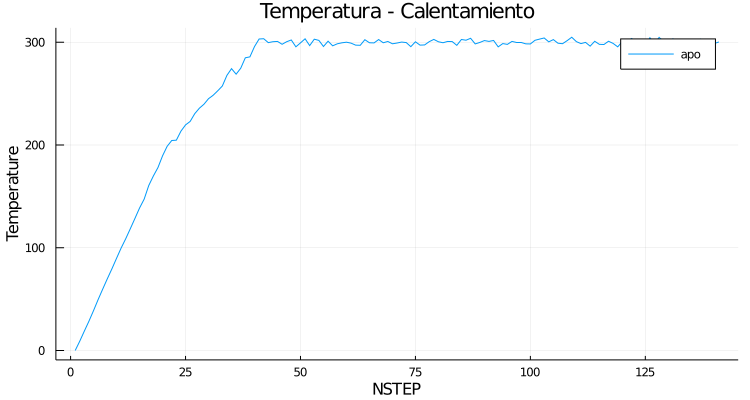

In [14]:
apo_hea_T = readdlm("$dir_apo_hea/outputs/temp.dat")[:, 2]

plot(apo_hea_T,
    label = "apo", title = "Temperatura - Calentamiento", size = (750, 400),
    yaxis = "Temperature", xaxis = "NSTEP")

## equilibration

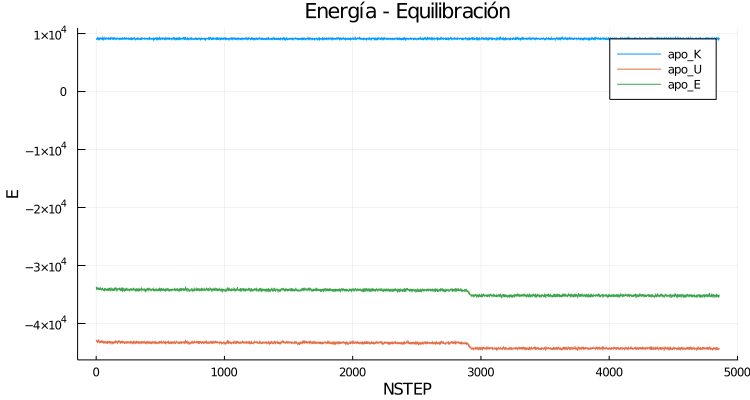

In [16]:
# Energies
dir_apo_equ="/home/pbarletta/labo/20/cph_obp/run/apo/mhe/e"
apo_equ_Ek = readdlm("$dir_apo_equ/outputs/ektot.dat")[:, 2]
apo_equ_Ep = readdlm("$dir_apo_equ/outputs/eptot.dat")[:, 2]
apo_equ_Etot = readdlm("$dir_apo_equ/outputs/etot.dat")[:, 2]

plot(apo_equ_Ek,
    label = "apo_K", title = "Energía - Equilibración", size = (750, 400),
    yaxis = "E", xaxis = "NSTEP")
plot!(apo_equ_Ep, label = "apo_U")
plot!(apo_equ_Etot, label = "apo_E")

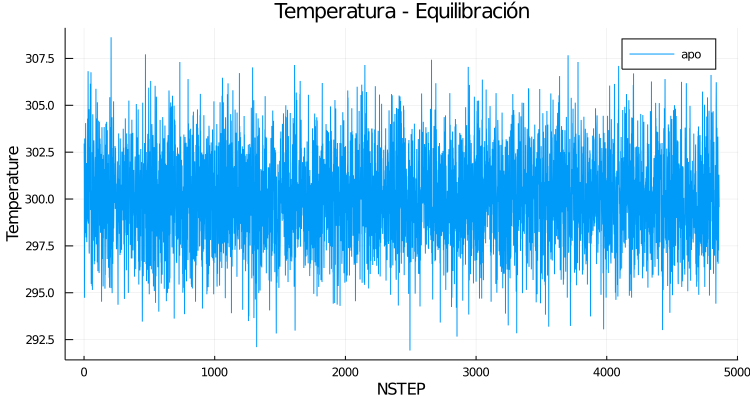

In [21]:
# Temperature
apo_equ_T = readdlm("$dir_apo_equ/outputs/temp.dat")[:, 2]

plot(apo_equ_T,
    label = "apo", title = "Temperatura - Equilibración", size = (750, 400),
    yaxis = "Temperature", xaxis = "NSTEP")

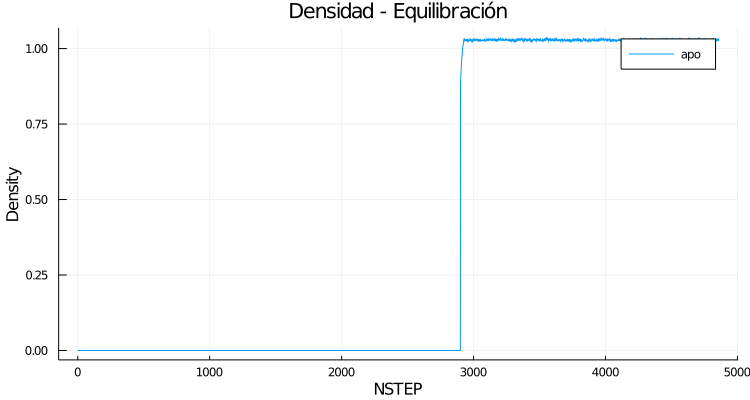

In [31]:
# Density
lb3_equ_dens = readdlm("$dir_apo_equ/outputs/density.dat")[:, 2]
# Only last part was ran at Pr=cte.
lb3_equ_dens[lb3_equ_dens .== ""] .= 0.0
lb3_equ_dens = convert(Array{Float64, 1}, lb3_equ_dens)

plot(lb3_equ_dens,
    label = "apo", title = "Densidad - Equilibración", size = (750, 400),
    yaxis = "Density", xaxis = "NSTEP")

# ctv

## minimization

In [39]:
dir_ctv_min="/home/german/labo/17/cph_obp/run/ctv/mhe/m"
ctv_min_Etot = readdlm("$dir_ctv_min/outputs/Etot_min");
ctv_mmin_Etot = readdlm("$dir_ctv_min/outputs/Etot_mmin");
df_ctv_MIN_Etot = DataFrame(E=[ctv_min_Etot[:, 2]; ctv_mmin_Etot[:, 2]],
NSTEP=[ctv_min_Etot[:, 1]; ctv_mmin_Etot[:, 1] .+ 500.0 ]);

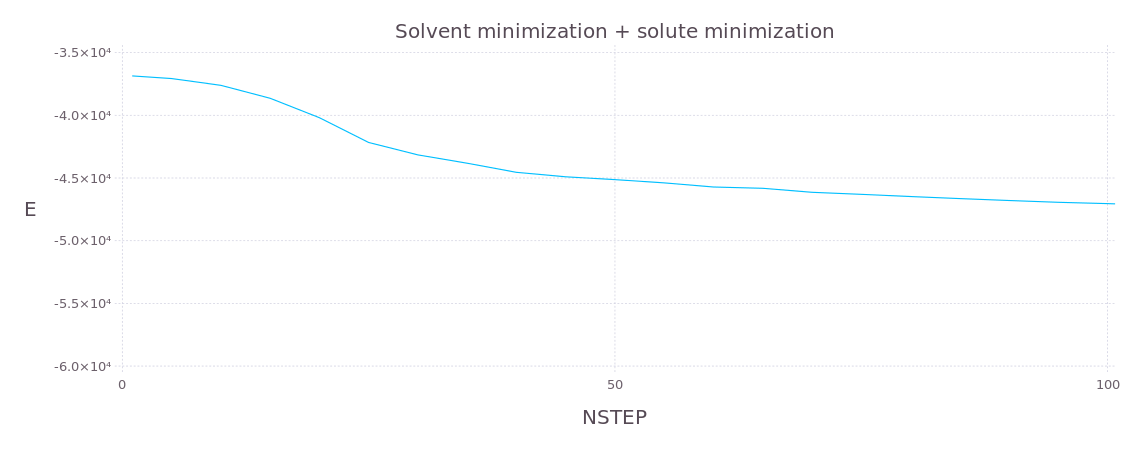

In [40]:
plot(df_ctv_MIN_Etot, Geom.line, x="NSTEP", y="E",
Coord.Cartesian(xmin=0, xmax=100),
Guide.title("Solvent minimization + solute minimization"),
Theme(minor_label_font_size = 10pt, major_label_font_size = 15pt, key_title_font_size = 30pt))

## heat

In [41]:
# Energies
dir_ctv_hea="/home/german/labo/17/cph_obp/run/ctv/mhe/h"
ctv_hea_Ek = readdlm("$dir_ctv_hea/outputs/ektot.dat");
ctv_hea_Ep = readdlm("$dir_ctv_hea/outputs/eptot.dat");
ctv_hea_Etot = readdlm("$dir_ctv_hea/outputs/etot.dat");

df_ctv_HEA_E = DataFrame(E=[ctv_hea_Ek[:, 2]; ctv_hea_Ep[:, 2]; ctv_hea_Etot[:, 2]],
NSTEP=[ctv_hea_Ek[:, 1]; ctv_hea_Ep[:, 1]; ctv_hea_Etot[:, 1]];
Type=repeat(["Ek"; "Ep"; "Etot"], inner=[length(ctv_hea_Ek[:, 1])]));

# Temperature
ctv_hea_T = readdlm("$dir_ctv_hea/outputs/temp.dat");
df_ctv_HEA_T = DataFrame(Temperature=ctv_hea_T[:, 2],
NSTEP=ctv_hea_T[:, 1]);

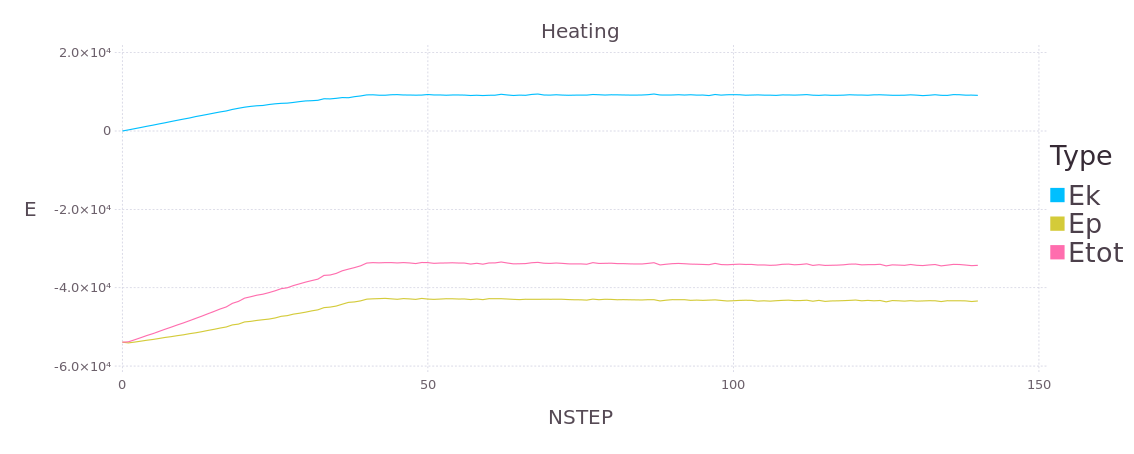

In [42]:
plot(df_ctv_HEA_E, Geom.line, x="NSTEP", y="E", color="Type",
Guide.title("Heating"),
Theme(minor_label_font_size = 10pt, major_label_font_size = 15pt,
key_title_font_size=20pt, key_label_font_size=20pt))

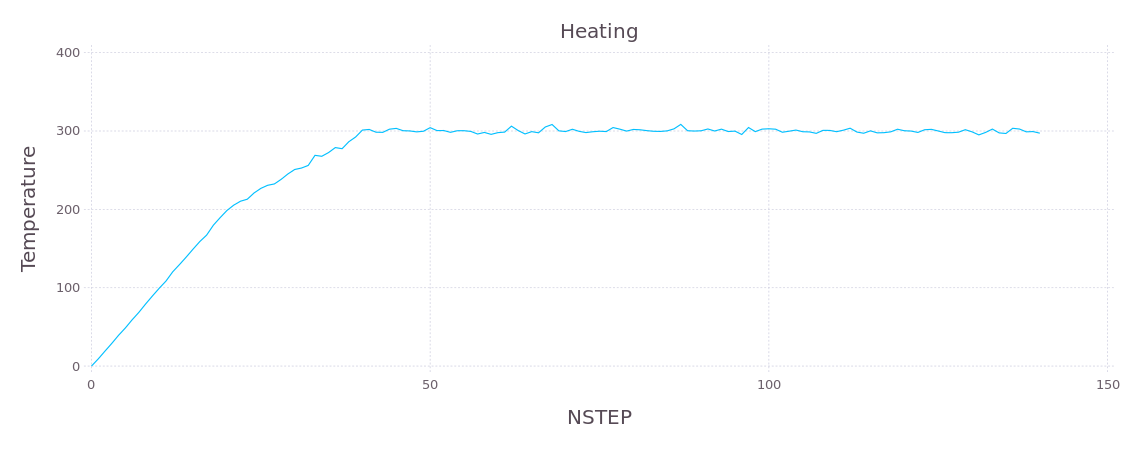

In [43]:
plot(df_ctv_HEA_T, Geom.line, x="NSTEP", y="Temperature",
Guide.title("Heating"),
Theme(minor_label_font_size = 10pt, major_label_font_size = 15pt,
key_title_font_size=20pt, key_label_font_size=20pt))

## equilibration

In [44]:
# Energies
dir_ctv_equ="/home/german/labo/17/cph_obp/run/ctv/mhe/e"
ctv_equ_Ek = readdlm("$dir_ctv_equ/outputs/ektot.dat");
ctv_equ_Ep = readdlm("$dir_ctv_equ/outputs/eptot.dat");
ctv_equ_Etot = readdlm("$dir_ctv_equ/outputs/etot.dat");

df_ctv_EQU_E = DataFrame(E=[ctv_equ_Ek[:, 2]; ctv_equ_Ep[:, 2]; ctv_equ_Etot[:, 2]],
NSTEP=[ctv_equ_Ek[:, 1]; ctv_equ_Ep[:, 1]; ctv_equ_Etot[:, 1]];
Type=repeat(["Ek"; "Ep"; "Etot"], inner=[length(ctv_equ_Ek[:, 1])]));

# Temperature
ctv_equ_T = readdlm("$dir_ctv_equ/outputs/temp.dat");
df_ctv_EQU_T = DataFrame(Temperature=ctv_equ_T[:, 2],
NSTEP=ctv_equ_T[:, 1]);

# RMSD ntwx=500
ctv_equ_rmsd = readdlm("$dir_ctv_equ/rmsd_equ_ctv");
df_ctv_EQU_RMSD = DataFrame(RMSD=ctv_equ_rmsd[:, 2], Frame=ctv_equ_rmsd[:, 1]);

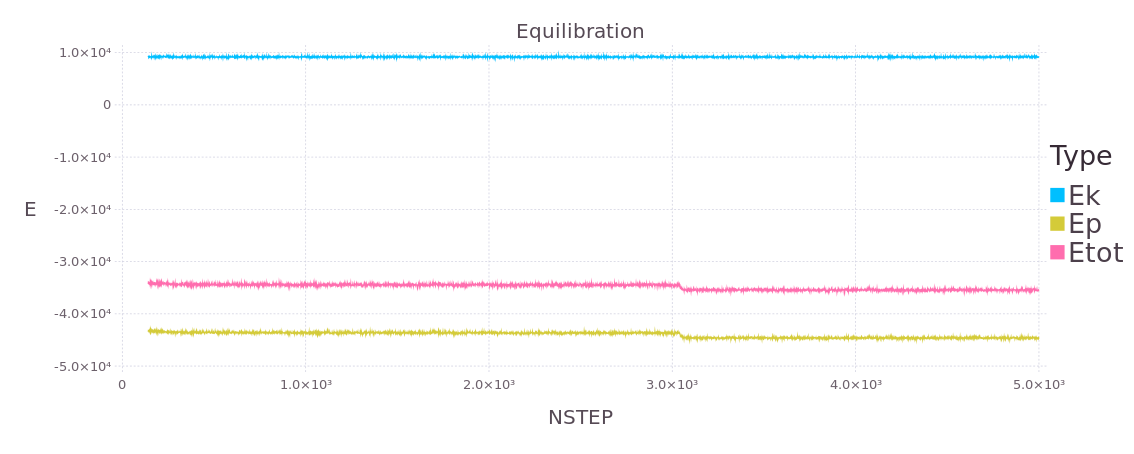

In [45]:
plot(df_ctv_EQU_E, Geom.line, x="NSTEP", y="E", color="Type",
Guide.title("Equilibration"),
Theme(minor_label_font_size = 10pt, major_label_font_size = 15pt,
key_title_font_size=20pt, key_label_font_size=20pt))

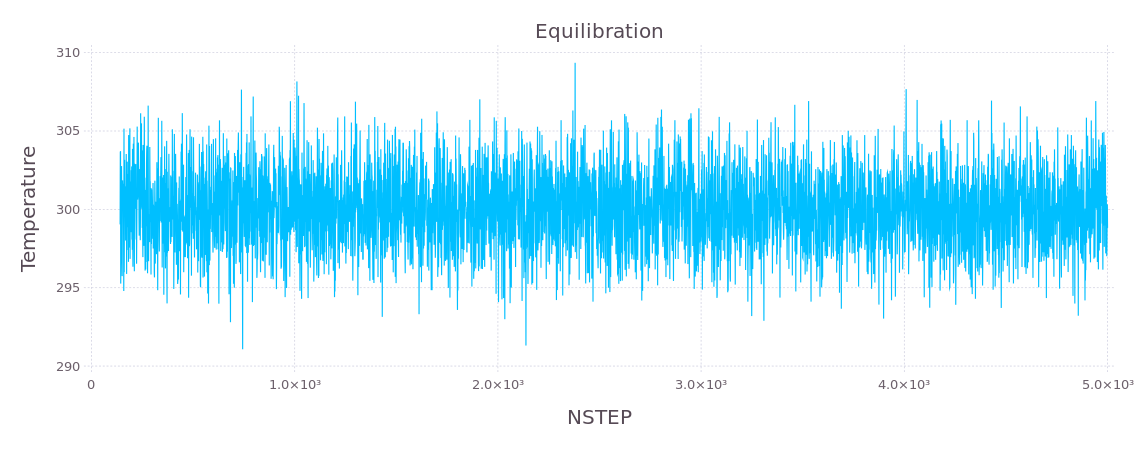

In [46]:
plot(df_ctv_EQU_T, Geom.line, x="NSTEP", y="Temperature",
Guide.title("Equilibration"),
Theme(minor_label_font_size = 10pt, major_label_font_size = 15pt,
key_title_font_size=20pt, key_label_font_size=20pt))

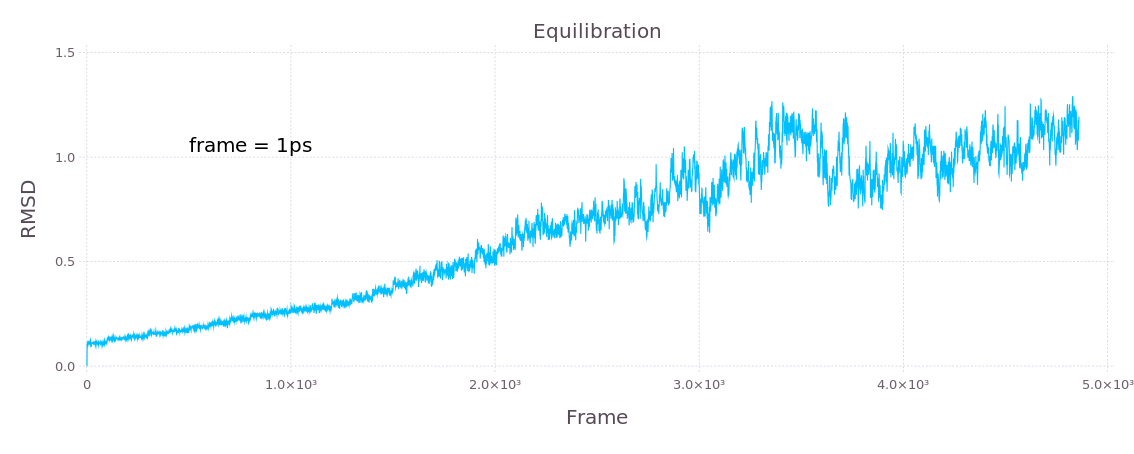

In [47]:
# Escribo c/ 1ps
plot(df_ctv_EQU_RMSD, Geom.line, x="Frame", y="RMSD",
Guide.title("Equilibration"),
Guide.annotation(compose(compose(context(), text(500, 1.0, "frame = 1ps")), fontsize(15pt), fill("black"))),
Theme(minor_label_font_size = 10pt, major_label_font_size = 15pt,
key_title_font_size=20pt, key_label_font_size=20pt))

# eol

## minimization

In [20]:
dir_eol_min="/home/german/labo/17/cph_obp/run/eol/mhe/m"
eol_min_Etot = readdlm("$dir_eol_min/outputs/Etot_min");
eol_mmin_Etot = readdlm("$dir_eol_min/outputs/Etot_mmin");
df_eol_MIN_Etot = DataFrame(E=[eol_min_Etot[:, 2]; eol_mmin_Etot[:, 2]],
NSTEP=[eol_min_Etot[:, 1]; eol_mmin_Etot[:, 1] .+ 500.0 ]);

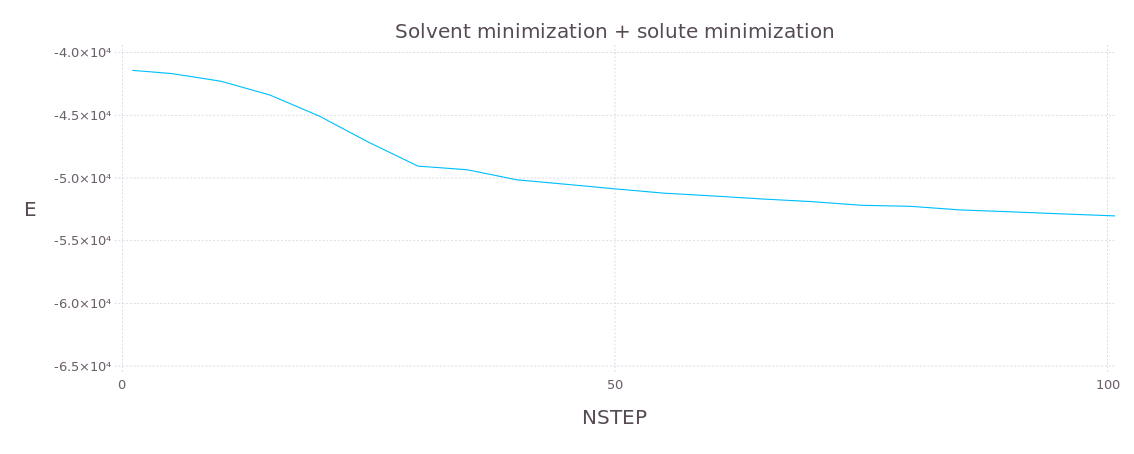

In [21]:
plot(df_eol_MIN_Etot, Geom.line, x="NSTEP", y="E",
Coord.Cartesian(xmin=0, xmax=100),
Guide.title("Solvent minimization + solute minimization"),
Theme(minor_label_font_size = 10pt, major_label_font_size = 15pt, key_title_font_size = 30pt))

## heat

In [22]:
# Energies
dir_eol_hea="/home/german/labo/17/cph_obp/run/eol/mhe/h"
eol_hea_Ek = readdlm("$dir_eol_hea/outputs/ektot.dat");
eol_hea_Ep = readdlm("$dir_eol_hea/outputs/eptot.dat");
eol_hea_Etot = readdlm("$dir_eol_hea/outputs/etot.dat");

df_eol_HEA_E = DataFrame(E=[eol_hea_Ek[:, 2]; eol_hea_Ep[:, 2]; eol_hea_Etot[:, 2]],
NSTEP=[eol_hea_Ek[:, 1]; eol_hea_Ep[:, 1]; eol_hea_Etot[:, 1]];
Type=repeat(["Ek"; "Ep"; "Etot"], inner=[length(eol_hea_Ek[:, 1])]));

# Temperature
eol_hea_T = readdlm("$dir_eol_hea/outputs/temp.dat");
df_eol_HEA_T = DataFrame(Temperature=eol_hea_T[:, 2],
NSTEP=eol_hea_T[:, 1]);

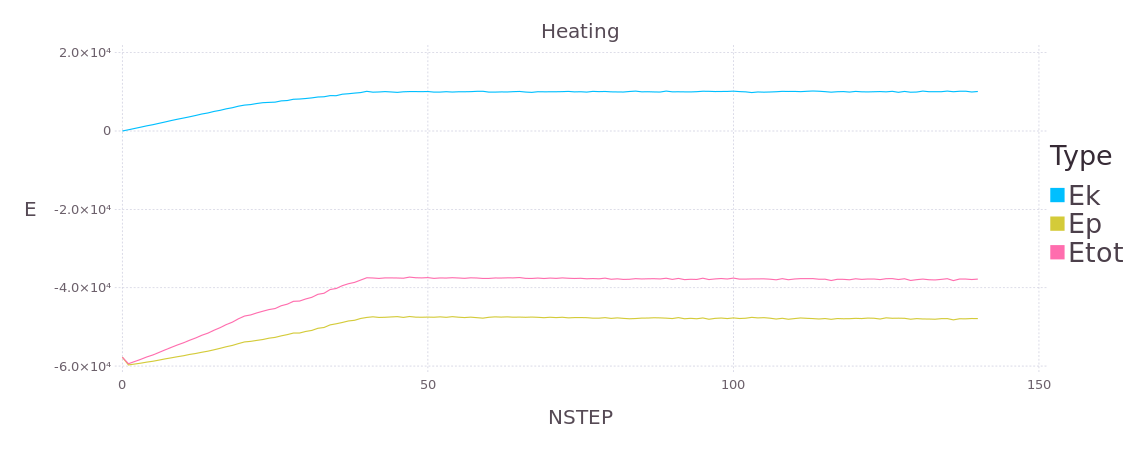

In [23]:
plot(df_eol_HEA_E, Geom.line, x="NSTEP", y="E", color="Type",
Guide.title("Heating"),
Theme(minor_label_font_size = 10pt, major_label_font_size = 15pt,
key_title_font_size=20pt, key_label_font_size=20pt))

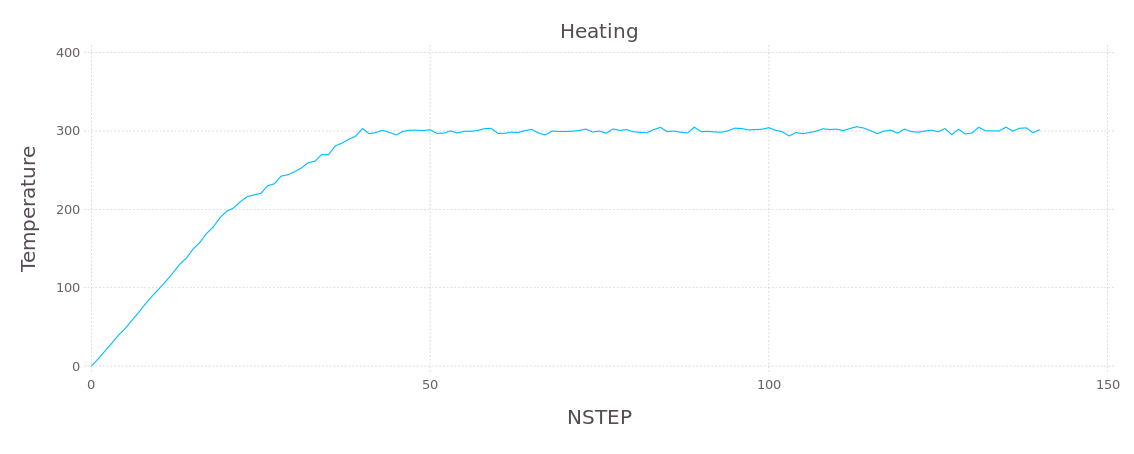

In [24]:
plot(df_eol_HEA_T, Geom.line, x="NSTEP", y="Temperature",
Guide.title("Heating"),
Theme(minor_label_font_size = 10pt, major_label_font_size = 15pt,
key_title_font_size=20pt, key_label_font_size=20pt))

## equilibration

In [25]:
# Energies
dir_eol_equ="/home/german/labo/17/cph_obp/run/eol/mhe/e"
eol_equ_Ek = readdlm("$dir_eol_equ/outputs/ektot.dat");
eol_equ_Ep = readdlm("$dir_eol_equ/outputs/eptot.dat");
eol_equ_Etot = readdlm("$dir_eol_equ/outputs/etot.dat");

df_eol_EQU_E = DataFrame(E=[eol_equ_Ek[:, 2]; eol_equ_Ep[:, 2]; eol_equ_Etot[:, 2]],
NSTEP=[eol_equ_Ek[:, 1]; eol_equ_Ep[:, 1]; eol_equ_Etot[:, 1]];
Type=repeat(["Ek"; "Ep"; "Etot"], inner=[length(eol_equ_Ek[:, 1])]));

# Temperature
eol_equ_T = readdlm("$dir_eol_equ/outputs/temp.dat");
df_eol_EQU_T = DataFrame(Temperature=eol_equ_T[:, 2],
NSTEP=eol_equ_T[:, 1]);

# RMSD ntwx=500
eol_equ_rmsd = readdlm("$dir_eol_equ/rmsd_equ_eol");
df_eol_EQU_RMSD = DataFrame(RMSD=eol_equ_rmsd[:, 2], Frame=eol_equ_rmsd[:, 1]);

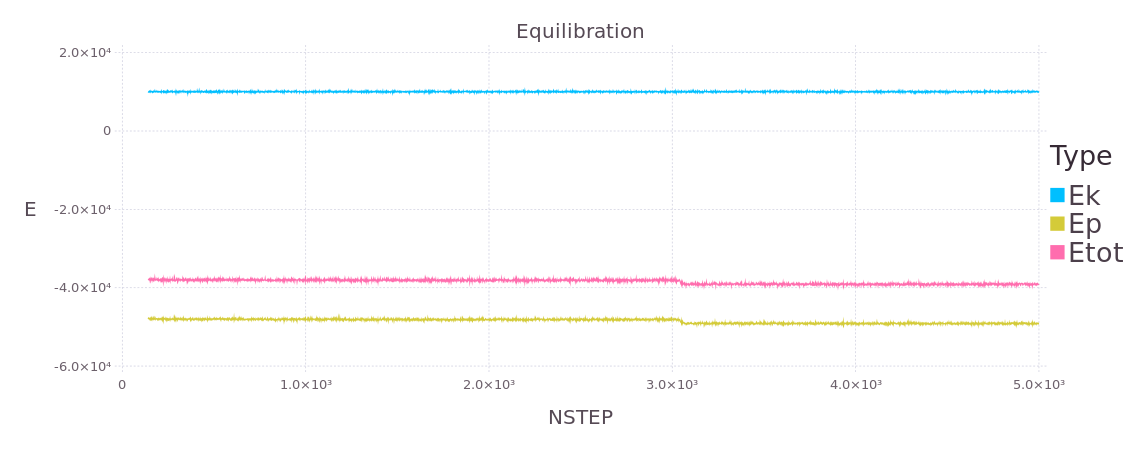

In [26]:
plot(df_eol_EQU_E, Geom.line, x="NSTEP", y="E", color="Type",
Guide.title("Equilibration"),
Theme(minor_label_font_size = 10pt, major_label_font_size = 15pt,
key_title_font_size=20pt, key_label_font_size=20pt))

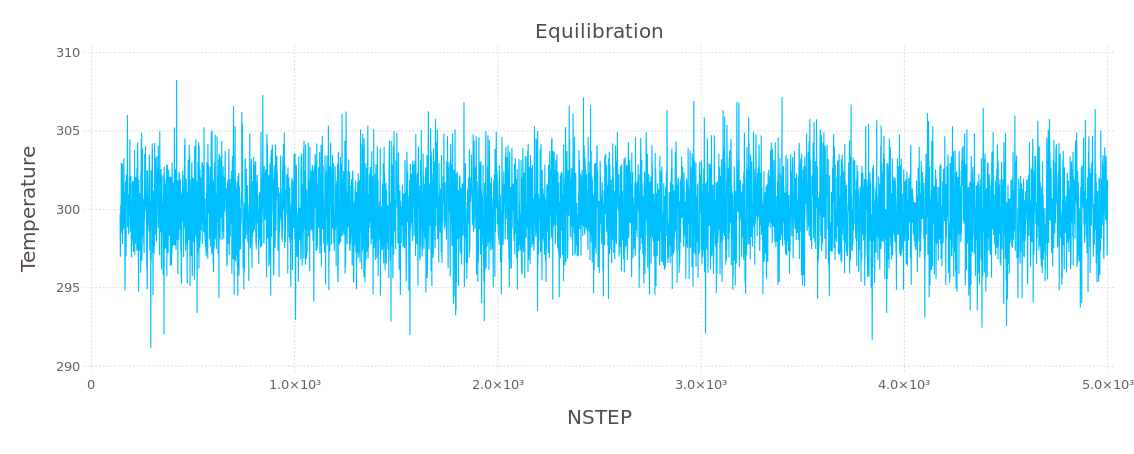

In [27]:
plot(df_eol_EQU_T, Geom.line, x="NSTEP", y="Temperature",
Guide.title("Equilibration"),
Theme(minor_label_font_size = 10pt, major_label_font_size = 15pt,
key_title_font_size=20pt, key_label_font_size=20pt))

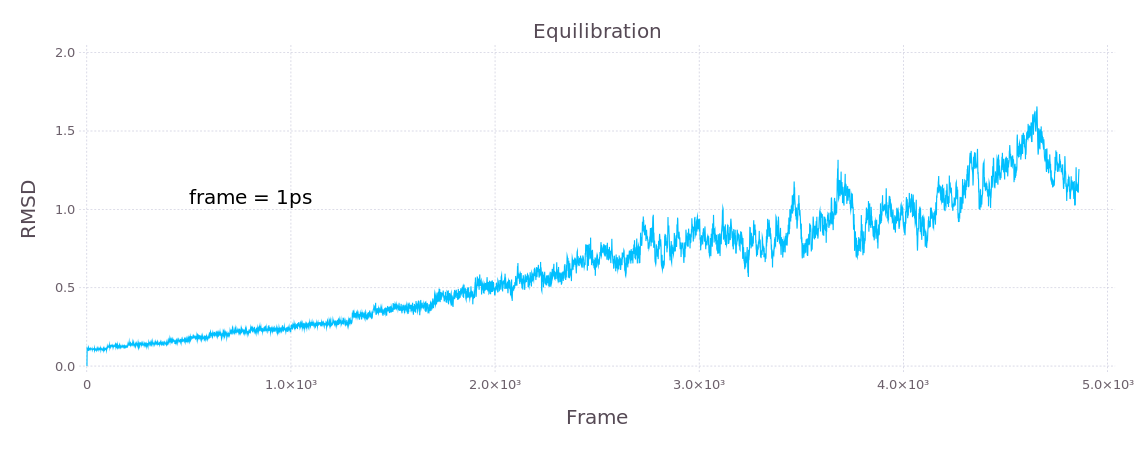

In [28]:
# Escribo c/ 1ps
plot(df_eol_EQU_RMSD, Geom.line, x="Frame", y="RMSD",
Guide.title("Equilibration"),
Guide.annotation(compose(compose(context(), text(500, 1.0, "frame = 1ps")), fontsize(15pt), fill("black"))),
Theme(minor_label_font_size = 10pt, major_label_font_size = 15pt,
key_title_font_size=20pt, key_label_font_size=20pt))